A SparseTree is a single tree in a TreeSequence. In this notebook, I'll consider these objects on their own.

We'll load the first tree from the previous example.

In [1]:
# Import packages.
import msprime, pyslim, numpy, IPython.display

# Create a very basic msprime setup with population structure, test.

population_configurations =[
    msprime.PopulationConfiguration(
    sample_size=3, initial_size=100),
    msprime.PopulationConfiguration(
    sample_size=3, initial_size=100)
]

demographic_events = [
    msprime.MassMigration(
    time=5, source=1, destination=0, proportion=1.0)
]

rho = 1e-4
mu  = 1e-3 

# Simulate with msprime.

ts = msprime.simulate(
    population_configurations=population_configurations,
    demographic_events=demographic_events,
    length=10,
    recombination_rate=rho,
    mutation_rate=mu,
    random_seed=1
)

for tree in ts.trees():
    print(tree.draw(format="unicode"))

   11        
┏━━┻━━┓      
┃     10     
┃  ┏━━┻━┓    
┃  ┃    9    
┃  ┃  ┏━┻┓   
┃  8  ┃  ┃   
┃ ┏┻┓ ┃  ┃   
┃ ┃ ┃ ┃  6   
┃ ┃ ┃ ┃ ┏┻┓  
2 0 1 3 4 5  

   11        
┏━━┻━━┓      
┃     10     
┃   ┏━┻━━┓   
┃   ┃    9   
┃   ┃   ┏┻┓  
┃   8   ┃ ┃  
┃ ┏━┻┓  ┃ ┃  
┃ ┃  7  ┃ ┃  
┃ ┃ ┏┻┓ ┃ ┃  
2 0 1 5 3 4  



First, let's consider a few different ways to represent this tree visually with the ```draw()``` function.

In [2]:
tree = ts.first()

print(tree.draw(format="unicode"))

print(tree.draw(format="ascii"))


   11        
┏━━┻━━┓      
┃     10     
┃  ┏━━┻━┓    
┃  ┃    9    
┃  ┃  ┏━┻┓   
┃  8  ┃  ┃   
┃ ┏┻┓ ┃  ┃   
┃ ┃ ┃ ┃  6   
┃ ┃ ┃ ┃ ┏┻┓  
2 0 1 3 4 5  

   11        
+--+--+      
|     10     
|  +--+-+    
|  |    9    
|  |  +-++   
|  8  |  |   
| +++ |  |   
| | | |  6   
| | | | +++  
2 0 1 3 4 5  



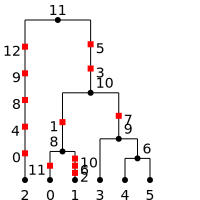

In [3]:
IPython.display.SVG(tree.draw())

**NOTE:** Why this is displaying the last tree, rather than the first, I'm not sure :/

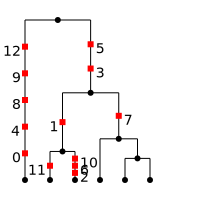

In [4]:
IPython.display.SVG(tree.draw(node_labels={}))

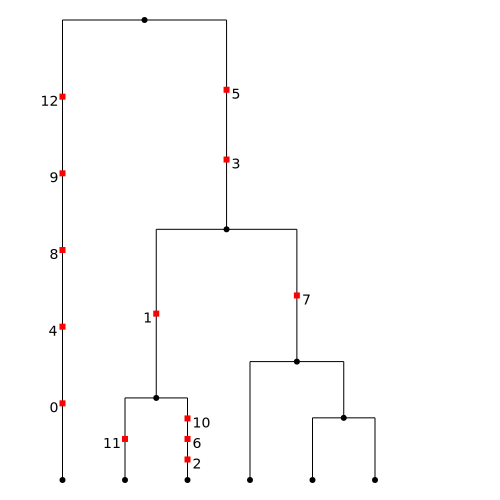

In [5]:
#print(tree.draw(format="unicode", width=5000, height=5000))
IPython.display.SVG(tree.draw(node_labels={}, width=500, height=500))

There appear to be some ways to colour and label nodes in particular ways using the ```node_labels``` and ```node_colours``` arguments, but I can't figure out how to input the argument correctly (the input must be a 'map')? Anyway, be aware that this is an option.

You can also save the trees by writing the output to a particular location using the ```path``` argument.

Let's see some summary info about our SparseTree.

In [6]:
print("The index this tree occupies in the TreeSequence:", tree.index, "\n")

print("The coordinates of the genomic interval that this tree represents the history of:", tree.interval, "\n")

print("The length of the genomic interval covered by this tree:", tree.length, "\n")

print("Number of mutations on this tree:", tree.num_mutations, "\n")

print("Number of nodes in this sparse tree:", tree.num_nodes, "\n")

print("Number of roots to the tree:", tree.num_roots, "\n")

print("Number of sites in this sparse tree:", tree.num_sites, "\n")

print("The tree root:", tree.root, "\n")

print("The sample size:", tree.sample_size, "\n")

print("Number of nodes in this sparse tree:", tree.num_nodes, "\n")

print("Total branch length:", tree.total_branch_length, "\n")

The index this tree occupies in the TreeSequence: 0 

The coordinates of the genomic interval that this tree represents the history of: (0.0, 8.805353552756214) 

The length of the genomic interval covered by this tree: 8.805353552756214 

Number of mutations on this tree: 13 

Number of nodes in this sparse tree: 12 

Number of roots to the tree: 1 

Number of sites in this sparse tree: 13 

The tree root: 11 

The sample size: 6 

Number of nodes in this sparse tree: 12 

Total branch length: 1520.298926179628 



Note that some of these are common to the entire TreeSequence, while some are specific to this particular tree.

We can get the TreeSequence back with ```tree_sequence```:

In [7]:
ts = tree.tree_sequence

for tr in ts.trees():
    print(tr.draw(format="unicode"))

   11        
┏━━┻━━┓      
┃     10     
┃  ┏━━┻━┓    
┃  ┃    9    
┃  ┃  ┏━┻┓   
┃  8  ┃  ┃   
┃ ┏┻┓ ┃  ┃   
┃ ┃ ┃ ┃  6   
┃ ┃ ┃ ┃ ┏┻┓  
2 0 1 3 4 5  

   11        
┏━━┻━━┓      
┃     10     
┃   ┏━┻━━┓   
┃   ┃    9   
┃   ┃   ┏┻┓  
┃   8   ┃ ┃  
┃ ┏━┻┓  ┃ ┃  
┃ ┃  7  ┃ ┃  
┃ ┃ ┏┻┓ ┃ ┃  
2 0 1 5 3 4  



We can also get a more traditional Newick representation of the tree (but see the documentation to read about some limitations of this feature)


In [8]:
tree.newick()

'(3:487.91558379532819,((1:87.05704331323707,2:87.05704331323707):178.84247677204408,(4:125.58636700016072,(5:65.92482819029316,6:65.92482819029316):59.66153880986757):140.31315308512043):222.01606371004704);'

### Nodes

Each SparseTree consists of nodes that represent genomes of distinct ancestors in particular points of time. In msprime, each node has a unique integer ID.

In [9]:
tree = ts.first()

n1 = 0
n2 = 9


These nodes are contained in the ```nodes()``` iterator, and can be retrieved in various orders:

In [10]:
# the default order is 'preorder': start from the top of the tree, then
# exhaustively visit each node in the order that a decision tree would,
# from left to right
node_list = []

for node in tree.nodes():
    node_list.append(node)
    
print(node_list)

[11, 2, 10, 8, 0, 1, 9, 3, 6, 4, 5]


In [11]:
# "Inorder": 
# Starting from the left-most leaf, list the parent node.
# Then, if all children of the parent have been listed,
# list the parent of the parent node.
node_list = []

for node in tree.nodes(order = "inorder"):
    node_list.append(node)
    
print(node_list)

[2, 11, 0, 8, 1, 10, 3, 9, 4, 6, 5]


In [12]:
# "Postorder":
# 
node_list = []

for node in tree.nodes(order = "postorder"):
    node_list.append(node)
    
print(node_list)

[2, 0, 1, 8, 3, 4, 5, 6, 9, 10, 11]


In [13]:
# "levelorder"
# The root(s) are printed first; then children of the roots; 
# ; then children of those children etc.
node_list = []

for node in tree.nodes(order = "levelorder"):
    node_list.append(node)
    
print(node_list)

[11, 2, 10, 8, 9, 0, 1, 3, 6, 4, 5]


We may be interested in the location of our selected node compared with other nodes:

In [14]:
print("Children of node 9:", 
     tree.children(n2),
     "\n")

print("Parent of node 9:", 
     tree.parent(n2),
     "\n")

print("Is node 9 internal (ie. not a leaf):", 
     tree.is_internal(n2),
     "\n")

print("Is node 9 a leaf:", 
     tree.is_leaf(n2),
     "\n")

print("Is node 0 a sample:", 
     tree.is_sample(n1),
     "\n")

Children of node 9: (3, 6) 

Parent of node 9: 10 

Is node 9 internal (ie. not a leaf): True 

Is node 9 a leaf: False 

Is node 0 a sample: True 



... population information:

In [15]:
print("Population of node 0:", 
     tree.population(n1),
     "\n")

Population of node 0: 0 



... it's relation to the sample nodes:

In [16]:
print("Number of samples in the subtree with node 9 as root:", 
     tree.num_samples(n2),
     "\n")

print("Number of tracked samples in the subtree with node 9 as root:", 
     tree.num_tracked_samples(n2),
     "\n")

Number of samples in the subtree with node 9 as root: 3 

Number of tracked samples in the subtree with node 9 as root: 0 



... as well as its position in time, both in an absolute sense, and in relation to other nodes:

In [17]:
print("Time of node 9 in generations (in the backwards-direction):", 
     tree.time(n2),
     "\n")

print("Length of the branch joining node 9 to its parent:", 
     tree.branch_length(n2),
     "\n")

Time of node 9 in generations (in the backwards-direction): 125.58636700016072 

Length of the branch joining node 9 to its parent: 140.31315308512043 



We can compare the location and 'distance' of different nodes in the tree:

In [18]:
print("MRCA of nodes 0 and 9:", 
     tree.mrca(n1, n2),
     "\n")

print("Time of MRCA of nodes 0 and 9:", 
     tree.tmrca(n1, n2),
     "\n")

MRCA of nodes 0 and 9: 10 

Time of MRCA of nodes 0 and 9: 265.89952008528115 



### Iterators that can be retrieved from a SparseTree object:

Various useful iterators can be retrieved from each SparseTree. The ```leaves()``` iterator returns each leaf node that descends from the input node (by default, the root node):

In [19]:
for leaf in tree.leaves(n2):
    print(leaf)

3
4
5


The individual mutations, the nodes they arrived on, and their position, as well as other mutation-specific information, are contained in the ```mutations()``` iterator:

In [20]:
for mut in tree.mutations():
    print(mut)

{'id': 0, 'site': 0, 'node': 2, 'derived_state': '1', 'parent': -1, 'metadata': b'', 'position': 0.18288280116394162, 'index': 0}
{'id': 1, 'site': 1, 'node': 8, 'derived_state': '1', 'parent': -1, 'metadata': b'', 'position': 0.592431970871985, 'index': 1}
{'id': 2, 'site': 2, 'node': 1, 'derived_state': '1', 'parent': -1, 'metadata': b'', 'position': 0.8171439440980768, 'index': 2}
{'id': 3, 'site': 3, 'node': 10, 'derived_state': '1', 'parent': -1, 'metadata': b'', 'position': 2.2212454839609563, 'index': 3}
{'id': 4, 'site': 4, 'node': 2, 'derived_state': '1', 'parent': -1, 'metadata': b'', 'position': 3.1551563390530646, 'index': 4}
{'id': 5, 'site': 5, 'node': 10, 'derived_state': '1', 'parent': -1, 'metadata': b'', 'position': 4.461345006711781, 'index': 5}
{'id': 6, 'site': 6, 'node': 1, 'derived_state': '1', 'parent': -1, 'metadata': b'', 'position': 4.562516381453547, 'index': 6}
{'id': 7, 'site': 7, 'node': 9, 'derived_state': '1', 'parent': -1, 'metadata': b'', 'position': 

In [21]:
for site in tree.sites():
    print(site)

{'id': 0, 'position': 0.18288280116394162, 'ancestral_state': '0', 'mutations': [{'id': 0, 'site': 0, 'node': 2, 'derived_state': '1', 'parent': -1, 'metadata': b''}], 'metadata': b''}
{'id': 1, 'position': 0.592431970871985, 'ancestral_state': '0', 'mutations': [{'id': 1, 'site': 1, 'node': 8, 'derived_state': '1', 'parent': -1, 'metadata': b''}], 'metadata': b''}
{'id': 2, 'position': 0.8171439440980768, 'ancestral_state': '0', 'mutations': [{'id': 2, 'site': 2, 'node': 1, 'derived_state': '1', 'parent': -1, 'metadata': b''}], 'metadata': b''}
{'id': 3, 'position': 2.2212454839609563, 'ancestral_state': '0', 'mutations': [{'id': 3, 'site': 3, 'node': 10, 'derived_state': '1', 'parent': -1, 'metadata': b''}], 'metadata': b''}
{'id': 4, 'position': 3.1551563390530646, 'ancestral_state': '0', 'mutations': [{'id': 4, 'site': 4, 'node': 2, 'derived_state': '1', 'parent': -1, 'metadata': b''}], 'metadata': b''}
{'id': 5, 'position': 4.461345006711781, 'ancestral_state': '0', 'mutations': [

At present I'm not really sure how 'sites' and 'mutations' differ, but hopefully we'll get to that...